##### Mitchell Scott (mtscot4)
##### Phys 731R: Random Matrix Theory
##### Prof. Ilya Nemenman
##### Spring 2024

# Homework #1
## Exercise 1.1.1
#### Consider the $N\times N$  square band diagonal matrix $\mathbf{M}_0$ defined by $[\mathbf{M}_0]_{ij} = 2\delta_{i,j-1}$:
$$\mathbf{M}_0 =\begin{pmatrix}
0&2&0 & \cdots& 0\\
0&0&2 & \cdots& 0\\
0&0&0&\ddots&0\\
0&0&0&\cdots&2\\
0&0&0&\cdots&0\\
\end{pmatrix}.$$
### (a) Show that $\mathbf{M}_0^N = 0$ and so all the eigenvalues of $\mathbf{M}_0$ must be zero. Use a numerical eigenvalue solver for non-symmetric matrices and confirm numerically that this is the case for $N=100$.

First it is easy to see that 
$$\mathbf{M}_0 = 2\begin{pmatrix}
0&1&0 & \cdots& 0\\
0&0&1 & \cdots& 0\\
0&0&0&\ddots&0\\
0&0&0&\cdots&1\\
0&0&0&\cdots&0\\
\end{pmatrix}$$
which is the right shift matrix, with all ones on the first super diagonal. Upon one round of matrix multiplication, we see $\mathbf{M}_0^2$ has all ones on the second super diagonal, with a $2^2=4$ as the scalar multiple. Inductively on matrix multiplication, we see that 
$$\mathbf{M}_0^{N-1} = 2^{N-1}\begin{pmatrix}0&0&\cdots&1\\\vdots&\vdots&\cdots&\vdots\\ 0&0&\cdots&0\end{pmatrix},$$ 

and continuing with the $N^{\text{th}}$ shift, the 1 in the top-right corner will be shifted to a zero leading to the all-zero matrix (with the coefficient $2^N$). This ultimately means that $\mathbf{M}_0^N = 0$.

We can deduce that all of the eigenvalues of $\mathbf{M}_0 = 0$ since we have just shown it is nilpotent. However, even easier, we see from the beginning that $\mathbf{M}_0$ is also an upper triangular matrix, so the eigenvalues can just be read off the diagonal, which means that $\lambda_i = 0,\forall i=1,2,...,N$. 

To show this numerically, we first create $\mathbf{M}_0$ and run an eigensolver on it as well as do $N$ matrix multiplications to show that $\mathbf{M}_0^N = 0$.

In [289]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [8]:
N = 100
M0 = 2*(np.tri(N,N,1,dtype = float) - np.tri(N,N,0,dtype = float))

M0

array([[0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
eigM0 = np.linalg.eigvals(M0)

eigM0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
M0N = np.linalg.matrix_power(M0,N)

M0N

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### (b) If $\mathbf{O}$ is an orthogonal matrix $\mathbf{OO}^\top = \mathbf{I}$, $\mathbf{OM}_0\mathbf{O}^\top$ has the same eigenvalues as $\mathbf{M}_0$. Following Exercise 1.2.4, generate a random orthogonal matrix $\mathbf{O}$. Numerically find the eigenvalues of $\mathbf{OM}_0\mathbf{O}^\top$. Do we get the same answer as in (a)?

Since $\mathbf{O}$ is orthogonal, we know that $\mathbf{O}^{-1}=\mathbf{O}^\top$, so $\mathbf{O}$ is invertible. This means we have $\mathbf{A} = \mathbf{OM}_0\mathbf{O}^\top$, so $\mathbf{A}$ is similar to $\mathbf{M}_0$, by definition.
\begin{align}
\mathbf{A}\mathbf{v} &= \lambda \mathbf{v}\\
\mathbf{OM}_0\mathbf{O}^\top\mathbf{v} &= \lambda \mathbf{v}\\
\mathbf{M}_0\mathbf{O}^\top\mathbf{v} &= \lambda \mathbf{O}^{\top}\mathbf{v}\\
\mathbf{M}_0\left(\mathbf{O}^\top\mathbf{v}\right) &= \lambda \left(\mathbf{O}^{\top}\mathbf{v}\right),
\end{align}

so we see that $\mathbf{M}_0$ and $\mathbf{A} = \mathbf{OM}_0\mathbf{O}^\top$ have the same eigenvalues and the eigenvectors of $\mathbf{A}, \mathbf{v}$ differ only by $\mathbf{O}^\top\mathbf{v}$.

In [37]:
Arand = np.matlib.rand(100,100)
O,S,Vt = np.linalg.svd(Arand)

np.eye(N) ==O@O.T

A = (O@M0)@O.T

eigA = np.linalg.eigvals(A)

eigA

array([ 1.37250178+0.04639067j,  1.37250178-0.04639067j,
        1.36862184+0.13844029j,  1.36862184-0.13844029j,
        1.35997066+0.22918912j,  1.35997066-0.22918912j,
        1.34579366+0.31891325j,  1.34579366-0.31891325j,
        1.32550929+0.40768283j,  1.32550929-0.40768283j,
        1.29878066+0.49507175j,  1.29878066-0.49507175j,
        1.26561967+0.58042922j,  1.26561967-0.58042922j,
        1.22627719+0.66313551j,  1.22627719-0.66313551j,
       -1.40425667+0.04526633j, -1.40425667-0.04526633j,
       -1.39843903+0.13571529j, -1.39843903-0.13571529j,
       -1.38663179+0.2258043j , -1.38663179-0.2258043j ,
        1.18111136+0.74266059j,  1.18111136-0.74266059j,
       -1.36866901+0.3150611j , -1.36866901-0.3150611j ,
        1.15690706+0.j        , -1.34451313+0.40290204j,
       -1.34451313-0.40290204j,  1.13053824+0.81855813j,
        1.13053824-0.81855813j, -1.31425192+0.48871805j,
       -1.31425192-0.48871805j,  1.07500595+0.89046845j,
        1.07500595-0.89046845j,

While we should get the same answer, due to numerical considerations, the eigenvalues of $\mathbf{OM}_0\mathbf{O}^\top$ are not what they are in part (a), namely $\lambda_i = 0,\forall i\in[N]$.

### (c) Consider $\mathbf{M}_1$ whose elements are all equal to those of $\mathbf{M}_0$ except for one element in the lower left corner $[\mathbf{M}]_{N,1} = (1/2)^{N-1}$. Show that $\mathbf{M}_1^N = \mathbf{I}$; more precisely, show that the characteristic polynomial of $\mathbf{M}_1$ is given by $\det(\mathbf{M}_1 - \lambda\mathbf{I}) = \lambda^N - 1$, therefore $\mathbf{M}_1$ has $N$ distinct eigenvalues equal to the $N$ complex roots of unity $\lambda_k = e^{2\pi i k/N}$.

The structure of $\mathbf{M}_1$ is that of a circulant matrix, just rescaled. Every time you raise $\mathbf{M}_1$ to the next power it shifts all of the elements up a row and if the element is in the top row it will "recirculate" it to the last row. Additionally it will multiply the element in the first column by 2. From this, it is easy to see when you apply the matrix to itself $N$ times, we have the elements cycled $N$ times so the elements that started in the first super diagonal will now be on the main diagonal. Similarly, the element in the lower left corner is now in the first row and has been multiplied by $(N-1)$ 2's, meaning it is a 1. Since we have only 1's on the main diagonal, it is identically the identity matrix, so $\mathbf{M}_1^N = \mathbf{I}$.

Now consider 
\begin{align}
\mathbf{M}_1 - \lambda\mathbf{I} &= \begin{pmatrix}
-\lambda &2 &0 & \cdots & 0\\
0 & -\lambda &2 & \cdots & 0\\
\vdots & \ddots & \ddots& \ddots & 0\\
\frac{1}{2^{N-1}} & 0 & 0 &\cdots & -\lambda
\end{pmatrix}
\end{align}

Consider the recursive definition for determinants based on the determinants of the minors. Suppose our $\mathbf{M}_1$ is size $N\times N$. Then there are only two terms we have to consider, originating from the two entries on the first row, $-\lambda$ and $2$. The determinant of the minor from $-\lambda$ is just $(-\lambda)^{N-1}$, since that minor is upper triangular and of size $(N-1)\times (N-1)$. The second determinant of the minor from $2$ is $2^{N-2}*\frac{1}{2^{N-1}}$ due to the sparsity pattern and diagonal structure. There are $N-2$ values since we are dealing with an $(N-1)\times (N-1)$ minor and the 2's are on the first super diagonal. This minor might have a leading + or - depending on the size of the matrix and the alternating sign of the minor. The other determinants of the minors are irrelevant since they are premultiplpied by zero. In summary,

\begin{align}
\det\left(\mathbf{M}_1 - \lambda\mathbf{I}\right) &= (-\lambda)(-\lambda)^{N-1} - (-1)^{N-2}2\left(2^{N-2}*\frac{1}{2^{N-1}}\right)\\
&= (-\lambda)^N - (-1)^{N-2}\\
&=0
\end{align}

If $N$ is odd, then we can multiply by -1 to both terms (since it equals 0) and derive the final equation
\begin{align}
\det\left(\mathbf{M}_1 - \lambda\mathbf{I}\right) &= \lambda^N - 1 = 0
\end{align}

This shows that the solutions to this characteristic polynomial, $\lambda_j = e^{2\pi i j/N}$, which are the roots of unity. This also corroborates the above argument for why $\mathbf{M}_1^N = \mathbf{I}$.

### (d) For $N$ greater than about 60, $\mathbf{OM}_0\mathbf{O}^\top$ and $\mathbf{OM}_1\mathbf{O}^\top$ are undistinguishable to machine precision. Compare numerically the eigenvalues of these two rotated matrices.

First the reason that $\mathbf{OM}_0\mathbf{O}^\top$ and $\mathbf{OM}_1\mathbf{O}^\top$ are indistinguishable is that $2^{60-1} = 2^{59} < 2^{53} = \epsilon_{\text{mach}}$, so any numerical computations, such as matrix multiplication are going to have round off error causing this difference to by moot.

In [261]:
M1 = M0 + 2**-(N-1) * np.tri(N,N,-N+1,dtype = float)

B = (O@M0)@O.T

eigB = np.linalg.eigvals(B)

diff = eigA - eigB

diff

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

Although the eigenvalues of $\mathbf{M}_0$ and $\mathbf{M}_1$ are different, and then in theory, the eigenvalues of $\mathbf{OM}_0\mathbf{O}^\top$ and $\mathbf{OM}_1\mathbf{O}^\top$ should be different; however the numerical eigensolver finds eigenvalues of $\mathbf{OM}_0\mathbf{O}^\top$ and $\mathbf{OM}_1\mathbf{O}^\top$ to be the same, which is different from the actual eigenvalues of both of the matrices. 

While floating point considerations might be involved, I think the dominant factor is the projection of both matrices onto the same subspace that causes issues.

## Exercise 1.2.1 
#### Show that the upper bound in Eq. (1.24) is a simple consequence of the Gersgorin Theorem.

Let $\lambda_{\max}$ be the largest eigenvalue of $\mathbf{A}$. Since $\mathbf{A}_{ij}>0$ and real, we omit the $|\cdot|$ in Gershgorin's Theorem.
\begin{align}
|\lambda_{\max}| - |A_{ii}| &\leq |\lambda_{\max} - A_{ii}| \qquad\text{(Triangle Inequality)}\\
&\leq \sum_{j\neq i} A_{ij} \qquad \qquad\text{ (Gershgorin)}\\
|\lambda_{\max}| &\leq A_{ii} + \sum_{j\neq i} A_{ij} \\
&=\sum_{j} A_{ij}\\
&\leq \max_i \sum_{j} A_{ij}
\end{align}
QED

## Exercise 1.2.4
#### We conclude this chapter on deterministic matrices with a numerical exercise on random matrices. Most of the results of this exercise will be explored theoretically in the following chapters.

In [394]:
n = 1000
sig1 = 10
sig2 = 1.0
sig3 = 0.01

alleigE1 = []
alleigE2 = []
alleigE3 = []

Pv12 = np.zeros(n)
Pv22 = np.zeros(n)
Pv32 = np.zeros(n)

s1 = np.zeros((198, 100))
s2 = np.zeros((198, 100))
s3 = np.zeros((198, 100))

for i in range(100):
    H1 = np.matlib.randn(n,n)
    H2 = np.matlib.randn(n,n)
    H3 = np.matlib.randn(n,n)
    
    X1 = (sig1/np.sqrt(2*n)) * (H1 + H1.T)
    X2 = (sig2/np.sqrt(2*n)) * (H2 + H2.T)
    X3 = (sig3/np.sqrt(2*n)) * (H3 + H3.T)
    
    M1,S,V = np.linalg.svd(H1) 
    M2,S,V = np.linalg.svd(H2) 
    M3,S,V = np.linalg.svd(H3)
    
    E1 = M1 + X1
    E2 = M2 + X2
    E3 = M3 + X3

    if i == 99:
        eigE1, evecE1 = np.linalg.eig(E1)
        eigE2, evecE2 = np.linalg.eig(E2)
        eigE3, evecE3 = np.linalg.eig(E3)

        for col in range(N):

            Pv1[:,col] = (0.5 * (M1 + np.identity(n))) @ evecE1[:,col]
            Pv2[:,col] = (0.5 * (M1 + np.identity(n))) @ evecE2[:,col]
            Pv3[:,col] = (0.5 * (M1 + np.identity(n))) @ evecE3[:,col]
    
            Pv12[col] = ((np.dot(Pv1[:,col].T, Pv1[:,col])).real)[0,0]
            Pv22[col] = ((np.dot(Pv2[:,col].T, Pv2[:,col])).real)[0,0]
            Pv32[col] = ((np.dot(Pv3[:,col].T, Pv3[:,col])).real)[0,0]
 
    else:   
        eigE1 = np.linalg.eigvals(E1)
        eigE2 = np.linalg.eigvals(E2)
        eigE3 = np.linalg.eigvals(E3)

    eigE1Sort = np.sort(eigE1)
    eigE2Sort = np.sort(eigE2)
    eigE3Sort = np.sort(eigE3)
    

    j = 0
    
    for lam in list(range(201,300)) + list(range(701,800)):
        s1[j,i] = eigE1Sort[lam].real - eigE1Sort[lam-1].real
        s2[j,i] = eigE2Sort[lam].real - eigE2Sort[lam-1].real
        s3[j,i] = eigE3Sort[lam].real - eigE3Sort[lam-1].real
        j += 1

    alleigE1 = np.append(alleigE1, eigE1)
    alleigE2 = np.append(alleigE2, eigE2)
    alleigE3 = np.append(alleigE3, eigE3)

### (a) Plot a histogram of the eigenvalues of $\mathbf{E}$, for a single sample first, and then for many samples (say 100).

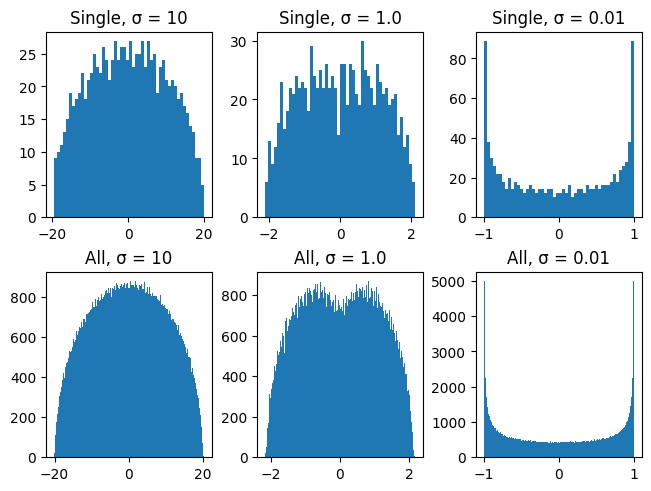

In [311]:
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, layout="constrained")

axs[0,0].hist(eigE1,50)
axs[0,1].hist(eigE2,50)
axs[0,2].hist(eigE3,50)
axs[0,0].set_title('Single, σ = 10')
axs[0,1].set_title('Single, σ = 1.0')
axs[0,2].set_title('Single, σ = 0.01')
    
axs[1,0].hist(alleigE1,150)
axs[1,1].hist(alleigE2,150)
axs[1,2].hist(alleigE3,150)
axs[1,0].set_title('All, σ = 10')
axs[1,1].set_title('All, σ = 1.0')
axs[1,2].set_title('All, σ = 0.01')


plt.show()

### (b) From your numerical analysis, in the large $N$ limit, for what values of $\sigma$ do you expect a nonzero density of eigenvalues near zero.

It seems that when $\sigma$ is greater than 1, we see the Wigner semi-circle law in all of its glory. However, as we decrease $\sigma$ to be about 1, we start to see a bifurcation and a cusp forming around $\lambda = 0$. Finally, as we further decrease $\sigma = 0.01$, we see that the semi-circle is gone. We see that the bifurcation has pushed most eigenvalues to either $\pm 1$. This does leave a small, but non-zero density of eigenvalues around 0. Even when you keep setting $\sigma\searrow 0$, we still see this behavior. I would say as $N\to\infty$, we probabily do continue to see that bifurcation to $\pm 1$. But even for $N=10000$, which took quite some time to compute, there was still a non-zero density around zero.

This bifurcation is because as $N\to \infty$, we are dealing with $\mathbb{R}^N$, which is a high dimensional hypersphere. Since most of the volume of hyperspheres are concentrated at the boundary so any perturbation essentially makes it orthogonal. This is why when we pick two high dimensional vectors, they are most likely orthogonal. This idea is what motivates many high dimensional numerical linear algebra decompositions like HOSVD, HOOI, etc.

### (c) For every normalized eigenvector $\mathbf{v}_i$ of $\mathbf{E}$, compute the norm of the vector $\mathbf{P}_+\mathbf{v}_i$. For a single sample, do a scatter plot of $|\mathbf{P}_+\mathbf{v}_i|^2$ vs $\lambda_i$ (its eigenvalue). Turn the scatter plot into an approximate conditional expectation value (using a histogram) including data from many samples.

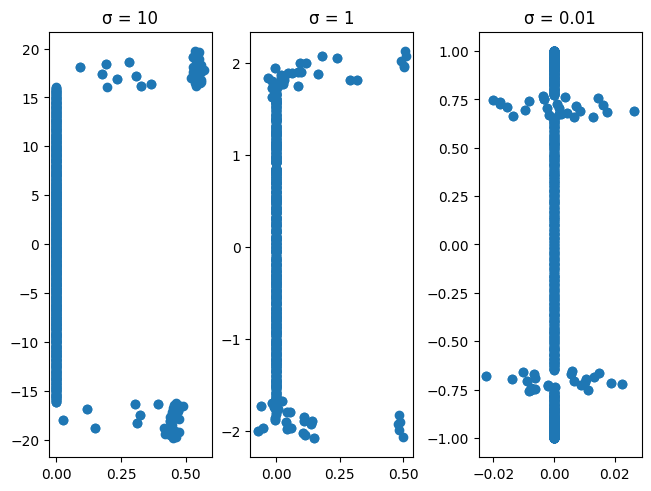

In [397]:
fig, axs = plt.subplots(1, 3, sharex=False, sharey=False, layout="constrained")

axs[0].scatter(Pv12, eigE1) 
axs[0].set_title('σ = 10')

axs[1].scatter(Pv22, eigE2) 
axs[1].set_title('σ = 1')

axs[2].scatter(Pv32, eigE3) 
axs[2].set_title('σ = 0.01')

plt.show()

### (d) Build the estimator $\Xi(\mathbf{E})$ of $\mathbf{M}$ using only data from $\mathbf{E}$. We want to minimize the error $\mathcal{E} = \frac{1}{N} \|\Xi(\mathbf{E}) - \mathbf{M}\|_F^2$, where $\|\mathbf{A}\|_F^2 = \text{tr}{\mathbf{AA}^\top}$. Consider first $\Xi_1(\mathbf{E}) = \mathbf{E}$ and then $\Xi_0(\mathbf{E}) = \mathbf{0}$. What is the error $\mathcal{E}$ of these two estimators? Try to build and ad-hoc estimator $\Xi(\mathbf{E})$ that has a lower error $\mathcal{E}$ than these two.

First notice that 

\begin{align}
\mathcal{E}_1 &= \frac{1}{N} \|\Xi_1(\mathbf{E}) - \mathbf{M}\|_F^2\\
&= \frac{1}{N} \|\mathbf{E} - \mathbf{M}\|_F^2\\
&= \frac{1}{N} \|(\mathbf{M} + \mathbf{X}) - \mathbf{M}\|_F^2\\
&= \frac{1}{N} \|\mathbf{X}\|_F^2
\end{align}

Similarly, since $\Xi_2 = \mathbf{0}$,
\begin{align}
    \mathcal{E}_2 &= \frac{1}{N} \|\Xi_2(\mathbf{E}) - \mathbf{M}\|_F^2\\
    &= \frac{1}{N} \| \mathbf{M}\|_F^2
\end{align}

In [343]:
err1 = (1/n) * LA.norm(X2,'fro') ** 2
err2 = (1/n) * LA.norm(M2,'fro') ** 2

print(err1,err2)

1.0012619683190687 1.0000000000000129


We see from above that both $\mathcal{E}_1$ and $\mathcal{E}_2$ are about 1, which makes sense as we have scaled out the size dependence. However, these are the two extremes of the estimator, so we propose to see if we can use $0.5\mathbf{E}$ as the ad-hoc estimator for this problem, $\Xi_3(\mathbf{E}) = 0.5\mathbf{E}$, which is allowed since we are only using information about $\mathbf{E}$.

\begin{align}
\mathcal{E}_3 &= \frac{1}{N} \|\Xi_3(\mathbf{E}) - \mathbf{M}\|_F^2\\
&= \frac{1}{N} \|0.5\mathbf{E} - \mathbf{M}\|_F^2\\
&= \frac{1}{N} \|0.5(\mathbf{M} + \mathbf{X}) - \mathbf{M}\|_F^2\\
&= \frac{1}{N} \|0.5\left(\mathbf{X} - \mathbf{M}\right)\|_F^2
\end{align}

In [370]:
err3 = (1/n) * LA.norm(0.5 * (X2 - M2), 'fro') ** 2

print(err3)

0.4994434735967252


By letting $\Xi_3(\mathbf{E}) = 0.5\mathbf{E}$, we have essentially found an estimator that depends solely on $\mathbf{E}$ that is between the two extreme cases presented in $\Xi_1(\mathbf{E})$ and $\Xi_2(\mathbf{E})$. We also see that this error is less than the error of the other estimators.

### (e) Show numerically that the eigenvalues of $\mathbf{E}$ are not IID. For each sample $\mathbf{E}$ rank its eigenvalues $\lambda_1<\lambda_2<\cdots<\lambda_N.$Consider the eigenvalue spacing $s_k = \lambda_k - \lambda_{k-1}$ for eigenvalues in the bulk ($0.2N<k<0.3N$ and $0.7N<k<0.8N)$. Make a histogram of $\{s_k\}$ including data from 100 samples. Make 100 psuedo-IID samples: mix eigenvalues for 100 different samples and randomly choose $N$ from the $100N$ possibilities, do not choose the same eigenvalue twice for a given psuedo-IID sample. For each pseudo-IID sample, compute $s_k$ in bulk and make a histogram of the values using data from all 100 psuedo-IID samples.

Text(0.5, 1.0, 'σ = 0.01')

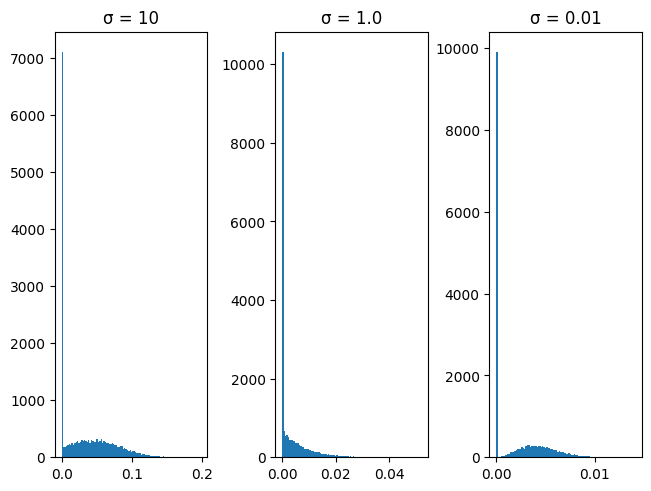

In [396]:
s1 = s1.flatten()
s2 = s2.flatten()
s3 = s3.flatten()

fig, axs = plt.subplots(1, 3, sharex=False, sharey=False, layout="constrained")

axs[0].hist(s1,100)
axs[1].hist(s2,100)
axs[2].hist(s3,100)
axs[0].set_title('σ = 10')
axs[1].set_title('σ = 1.0')
axs[2].set_title('σ = 0.01')

### Make 100 psuedo-IID samples: mix eigenvalues for 100 different samples and randomly choose $N$ from the $100N$ possibilities, do not choose the same eigenvalue twice for a given psuedo-IID sample. For each pseudo-IID sample, compute $s_k$ in bulk and make a histogram of the values using data from all 100 psuedo-IID samples.

I don't know what a psuedo - IID sample is, so I don't know how to do this problem, but I will present psuedocode for everything else.

In [400]:
# for i in range(100):
#     Construct 3 psuedo-IID samples using σ = 10, 1, 0.01 as before. These are probably matrices that are $n \times n$
#     psIID1 = 
#     psIID2 = 
#     psIID3 = 

    # Find the eigenvalues for all of these psuedo-IID matrices
    # eigP1 = np.linalg.eigvals(psIID1)
    # eigP2 = np.linalg.eigvals(psIID2)
    # eigP3 = np.linalg.eigvals(psIID3)

    # Sort the eigenvalues
    # eigP1Sort = np.sort(eigP1)
    # eigP2Sort = np.sort(eigP2)
    # eigP3Sort = np.sort(eigP3)

    # Construct s_k = eig_k - eig_{ k }
       
    # for lam in range(N):
    #     sp1[lam,i] = eigP1Sort[lam].real - eigP1Sort[lam-1].real
    #     sp2[lam,i] = eigP2Sort[lam].real - eigP2Sort[lam-1].real
    #     sp3[lam,i] = eigP3Sort[lam].real - eigP3Sort[lam-1].real

# Make matrix into vector
# sp1 = sp1.flatten()
# sp2 = sp2.flatten()
# sp3 = sp3.flatten()

# Choose N randomly from all 100N
# sp1rand = random.choices(sp1, k   N)
# sp2rand = random.choices(sp2, k = N)
# sp3rand = random.choices(sp3, k = N)

# fig, axs = plt.subplots(1, 3, sharex=False, sharey=False, layout="constrained")

# axs[0].hist(s1,100)
# axs[1].hist(s2,100)
# axs[2].hist(s3,100)
# axs[0].set_title('σ = 10')
# axs[1].set_title('σ = 1.0')
# axs[2].set_title('σ = 0.01')


SyntaxError: source code string cannot contain null bytes (<string>)

### (BONUS) Try to fit an exponential distribution to these two histograms. The IID case should be well fitted by the expontential but not the original data (not IID).

Ran out of time :(

## Problem 4:
#### Verify Gershgorin Circle theorem numerically by generating a few (~5) 4x4 matrices with gaussian random values on the diagonal with a variance of 1 and gaussian random variables off-diagonal with the variance 0.01, diagonalizing them, and checking if the eigenvalues of the matrix fall into Gershgorin circles.  

In [229]:
evalsY = np.zeros(20).reshape((5,4))
circ = np.zeros(60).reshape(5,4,3)

for i in range(5):
    mat = 0.01*np.matlib.randn(4,4)
    mat[np.diag_indices(4)] = np.matlib.randn(1,4)
    evalsY[i] = np.linalg.eigvals(mat)
    
    for j in range(4):
        radius = np.sum(abs(mat[j])) - mat[j,j]
        circ[i,j] = [mat[j,j].real, mat[j,j].imag, radius]

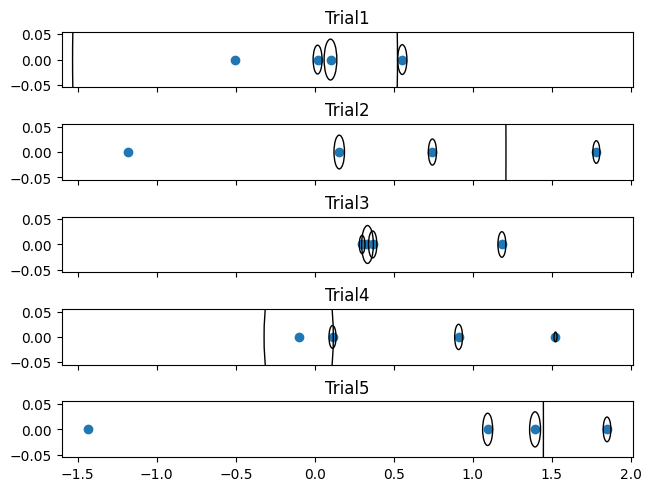

In [230]:
fig, axs = plt.subplots(5, 1, sharex=True, sharey=False, layout="constrained")
for i in range(5):
    axs[i].scatter(evalsY[i].real, evalsY[i].imag)
    for j in range(4):
        circle1 = plt.Circle((circ[i,j,0],circ[i,j,1]),circ[i,j,2],fill = False)
        axs[i].add_artist(circle1)
    axs[i].set_title('Trial' + str(i+1))

plt.show()

While we were able to visualize the Gershgorin discs and the eigenvalues in their respective discs, it is interesting to note that some discs are very small, while others are rather large. One issue of this problem is that all of the eigenvalues appear to be real. This shouldn't be the case as we didn't guarantee a symmetric random matrix. This most likely comes down to the fact that the diagonal entries are expected to be much larger in magnitude compared to the off diagonal entries, tricking the numerical eigensolver into thinking that the small imaginary contributions should be ignored, as they might be from numerical instability.

## Exercise 2.3.1

#### Let $\mathbf{A}$ be a random matrix drawn from a well-behaved ensemble with Stieltjes transform $\mathfrak{g}(z)$. What are the Stieljes transforms of the random matrices $\alpha \mathbf{A}$ and $\mathbf{A} + \beta\mathbf{I}$ where $\alpha$ and $\beta$ are non-zero numbers and $\mathbf{I}$ is the identity matrix.

First, observe from the textbook that the Stieltjes transform of $\mathbf{A}$ is
\begin{align}
g_N^{\mathbf{A}}(z) &= \frac{1}{N} \text{Tr}\left(\mathbf{G}_{\mathbf{A}}(z)\right)\\
&= \frac{1}{N} \sum_{k=1}^N \frac{1}{z-\lambda_k}.
\end{align}

This means that we have an explicit relationship between Stieltjes transform of $\mathbf{A}$ and the eigenvalues, $\lambda_k$, of $\mathbf{A}$. This means to solve the problem, we must find the eigenvalues of $\alpha\mathbf{A}$ and $\mathbf{A} + \beta\mathbf{I}$, where $\alpha, \beta \in\mathbb{R}$.

For the scaled case, it is easy to verify that the eigenvalues are scaled as well:
\begin{align}
\mathbf{Av} &= \lambda\mathbf{v}\\
\alpha\mathbf{Av} &= \alpha\lambda\mathbf{v}\\
\left(\alpha\mathbf{A}\right)\mathbf{v} &= \left(\alpha\lambda\right)\mathbf{v}
\end{align}

Using this fact that scaling a matrix scales its eigenvalues, combined with the fact that the identity matrix has all eigenvalues equal to 1, we arrive at
\begin{align}
\mathbf{Av}+\beta\mathbf{Iv} &= \lambda\mathbf{v} + \beta\mathbf{v}\\
\left(\mathbf{A} + \beta\mathbf{I}\right)\mathbf{v} &= \left(\lambda + \beta\right) \mathbf{v}
\end{align}

This leads us to the Stieltjes transform for a scaled and shifted matrix to be

\begin{align}
g_N^{\alpha\mathbf{A}}(z)&= \frac{1}{N} \sum_{k=1}^N \frac{1}{z-\alpha\lambda_k}\\
g_N^{\mathbf{A} +\beta\mathbf{I}}(z)&= \frac{1}{N} \sum_{k=1}^N \frac{1}{z-\left(\lambda_k +\beta\right)}\\
&= \frac{1}{N} \sum_{k=1}^N \frac{1}{\left(z-\beta\right)-\lambda_k}
\end{align}

## Problem 6:
#### Generate 300x300 (or larger) Wigner matrix, diagonalize it numerically. Repeat many times and build a complex histogram of the eigenvalues. Do you see the Wigner semi-circle? 

In [57]:
n = 5000
sigma = 1

H = np.matlib.randn(n,n)
X = (sigma/np.sqrt(2*n))*(H + H.T)
evalsX = np.linalg.eigvals(X)


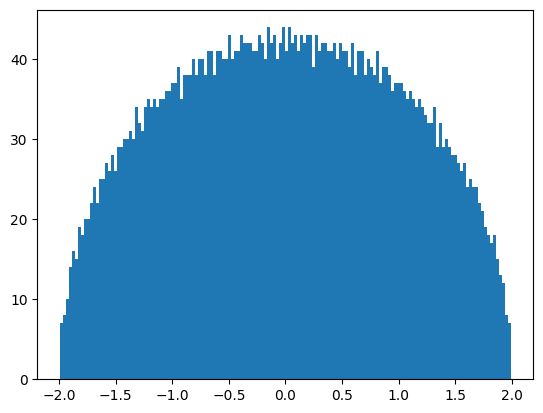

In [234]:
plt.hist(evalsX,150)
plt.show()

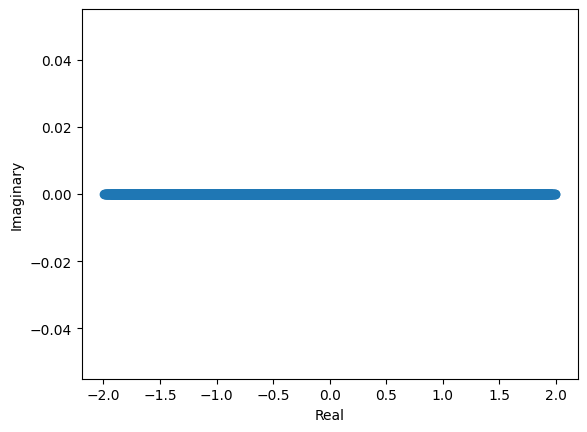

In [68]:
reX = [elem.real for elem in evalsX]
imX = [elem.imag for elem in evalsX]

plt.scatter(reX, imX) 
plt.ylabel('Imaginary') 
plt.xlabel('Real') 
plt.show() 

The result of the real histogram shows us that as $n\to\infty$, the distribution of the eigenvalues approach the semi-circular distribution that Wigner proposed. Additionally, the result of plotting the eigenvalues in the complex plane shows that all eigenvalues are spread out on the real line, but have zero imaginary part. This numerically illustrates that the eigenvalues of a symmetric matrix are all real.

#### Now generate a gaussian, unit variance random matrix without the symmetry constraint. What is the structure of the histogram of eigenvalues (see Fig 3.1 if you get confused)? 

In [62]:
G = (sigma/n)*H
evalsG = np.linalg.eigvals(G)

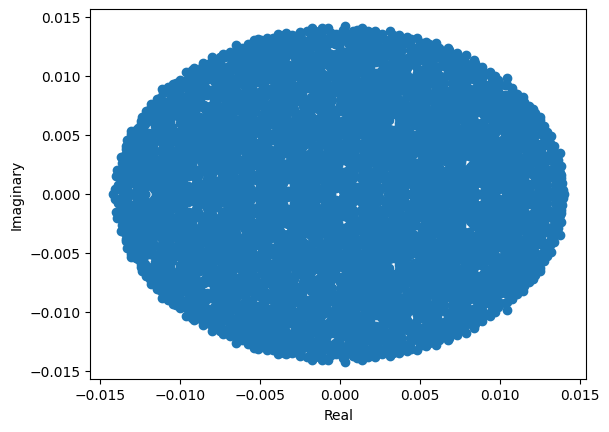

In [67]:
reG = [elem.real for elem in evalsG]
imG = [elem.imag for elem in evalsG]

plt.scatter(reG, imG) 
plt.ylabel('Imaginary') 
plt.xlabel('Real') 
plt.show() 

#### Now consider the following: $N\to\infty$ biological species are interacting in a random ecology, so that the activity of the $i^\text{th}$ species is $\frac{dx_i}{dt} = f_i({x_j})$. Say that the system has a steady state, and the deviation of the $i^\text{th}$ species from the steady state, divided by the relaxation time of this species, is $y_i$. Then the dynamics around the steady state is $\frac{dy_i}{dt} = k\sum_{j\neq i}A_{ij} - y_i$, where we chose $k$ such that the values $A_{ij}$ can be considered Gaussian distributed with zero mean and unit variance. Given your numerical simulations from above, at which values of $k$ will this steady state be stable?

My answer is very similar to what was discussed in class on 1/31. As $N\to\infty$, theoretically, there is not going to be a stable ecology. If we have $k$ is larger than the restoring force of the system, then we will have the system behave chaotically. This implies that the real part of the eigenvalues is greater than 1, since the solution of the system of ODEs is the exponential function, and will grow rapidly in this case. 